# License Plate Number Detection

In [22]:
import cv2
import imutils
import pytesseract
import numpy as np
from matplotlib import pyplot as plt

User defined function to convert images from BGR to RGB format 

In [23]:
def bgr2rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Input and pre-processing of Image

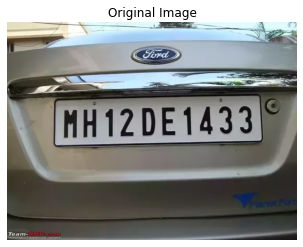

In [24]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files (x86)\Tesseract-OCR\tesseract.exe'

img = cv2.imread('pic.jpg',cv2.IMREAD_COLOR)
plt.imshow(bgr2rgb(img))
plt.title('Original Image')
plt.axis('off')

img = cv2.resize(img, (600,400) )

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
img_gray = cv2.bilateralFilter(img_gray, 13, 15, 15)

# Edge Detection

(-0.5, 599.5, 399.5, -0.5)

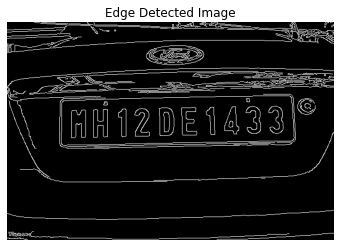

In [25]:
edge_det = cv2.Canny(img_gray, 30, 200)
plt.imshow(bgr2rgb(edge_det))
plt.title('Edge Detected Image')
plt.axis('off')

# License Plate Detection

(-0.5, 599.5, 399.5, -0.5)

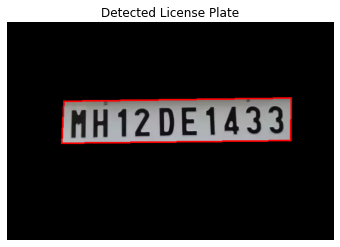

In [26]:
contours = cv2.findContours(edge_det.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(contours)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]
screenCnt = None

for c in contours:
    
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.018 * peri, True)
 
    if len(approx) == 4:
        screenCnt = approx
        break

if screenCnt is None:
    detected = 0
    print ("No contour detected")
else:
     detected = 1

if detected == 1:
    cv2.drawContours(img, [screenCnt], -1, (0, 0, 255), 3)
    
mask = np.zeros(img_gray.shape,np.uint8)
new_image = cv2.drawContours(mask,[screenCnt],0,255,-1,)
new_image = cv2.bitwise_and(img,img,mask=mask)

plt.imshow(bgr2rgb(new_image))
plt.title('Detected License Plate')
plt.axis('off')

# Text or Number Detection

(-0.5, 399.5, 199.5, -0.5)

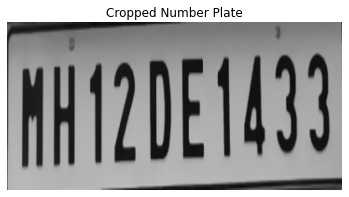

In [27]:
(x, y) = np.where(mask == 255)
(topx, topy) = (np.min(x), np.min(y))
(bottomx, bottomy) = (np.max(x), np.max(y))
cropped_img = img_gray[topx:bottomx+1, topy:bottomy+1]

plate_text = pytesseract.image_to_string(cropped_img, config='--psm 11')
img = cv2.resize(img,(500,300))
cropped_img = cv2.resize(cropped_img,(400,200))

cropped_img = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
plt.imshow(cropped_img)
plt.title('Cropped Number Plate')
plt.axis('off')

In [28]:
print("Detected license plate Number is:",plate_text)

Detected license plate Number is: MH12DE1433


